# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

My best value for one solution is x = 1.999999001495821
[3. 2. 1.]


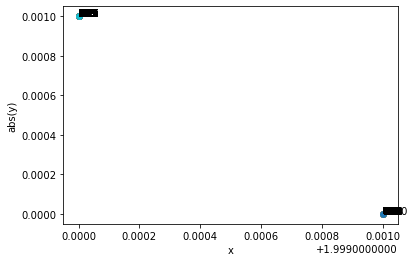

In [225]:
import numpy as np
import matplotlib.pyplot as plt

derivativerate = .001

#defining the derivative of the polynomial
def func(x):
    y = (x**3)-6*(x**2)+11*x-6
    return abs(y)

#getting derivative of the derivative to try and find the local minima
def derivative(x):
    DERIVATIVE = (func(x+derivativerate)-func(x))/derivativerate
    return DERIVATIVE

#some parameters needed
n = 0
currentx = 2
rate = 0.001

# Plotting initial derivative value
plt.plot(currentx, func(currentx),'o')
plt.text(currentx, func(currentx),n)

#minimizing derivative value
while n < 1000:
    newx = currentx - rate * derivative(currentx)
    #print(derivative(currentx))
    currentx = newx
    #print(newx)
    n = n + 1
    plt.plot(newx, func(newx),'o')
    plt.text(newx, func(newx),n)

#plotting and printing solution value
print("My best value for one solution is x =", newx)
plt.xlabel("x")
plt.ylabel("abs(y)")

poly = [1, -6, 11, -6]

print(np.roots(poly))

#loooooks good

## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [226]:
import pandas as pd
import numpy as np

dat = pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\cars.csv")

dat4 = dat.loc[dat["cyl"] == 4]

dat6 = dat.loc[dat["cyl"] == 6]

dat4_6= pd.concat([dat4, dat6])

dat8 = dat.loc[dat["cyl"] == 8]

print("The mean for 4 and 6 cylinder cars is ", dat4_6["mpg"].mean())

print("The mean for 8 cylinder cars is ", dat8["mpg"].mean())

The mean for 4 and 6 cylinder cars is  23.97222222222222
The mean for 8 cylinder cars is  15.100000000000003


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



Our regression intercept is  23.97222222222222 and our slope is -8.87222222222222


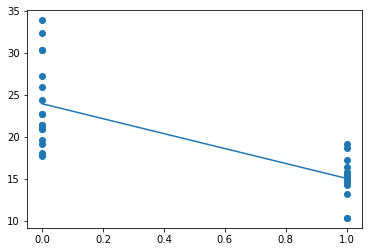

In [227]:
import pandas as pd
import numpy as np
from numpy.linalg import inv 
import matplotlib.pyplot as plt

dat = pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\cars.csv")

#Call specific rows, organizing the dataframes by cylinder type
dat4 = dat.loc[dat["cyl"] == 4]
dat6 = dat.loc[dat["cyl"] == 6]
dat8 = dat.loc[dat["cyl"] == 8]

#Concatinate dat4 and dat6
dat4_6 = pd.concat([dat4, dat6])

#Create array of mpg column for linalg
dat4_6_mpg_list = dat4_6["mpg"].values.tolist()
dat8_mpg_list = dat8["mpg"].values.tolist()
dat4_6_mpg_array = np.array(dat4_6_mpg_list)
dat8_mpg_array = np.array(dat8_mpg_list)
datmpg = np.append([dat4_6_mpg_array],[dat8_mpg_array])

#Create array of 0s and 1s columns for linalg
dat4_6length = len(dat4_6.index)
dat8length = len(dat8.index)
dat0s = np.zeros(dat4_6length)
dat1s = np.ones(dat8length)
dat01s = np.append([dat0s],[dat1s])
dat1s2 = np.ones(len(dat01s))

#Create matrix
matrix = np.vstack((dat1s2, dat01s)).T
datX = matrix[:,0]
datY = matrix[:,1]

tmp = inv(np.matmul(np.transpose(matrix),matrix))

INTERCEPT, SLOPE = tmp @ np.transpose(matrix) @ datmpg

print("Our regression intercept is ", INTERCEPT, "and our slope is", SLOPE)

plt.scatter(dat01s,datmpg)
plt.plot([0, 1],[INTERCEPT, INTERCEPT + SLOPE])

This is a very sensible output, the regression intercept is approximately the average mpg for the 4 and 6 cylinder engines, and it descends to approximately the average for the other cylinder cars.